<font size=6><b>Home assignment2 - Difference equations</b></font><br/>
<font size=5>October 2020</b><br/>
<font size=3>Barbora Jakubová<br/>



# Problem 1

Find complete solution (without any software) of these difference equations and discuss stability of equilibrium:

<font color=blue><b>1) $2y_{n+1}+0.6y_n=13$</b></font>

Homogenous equation: $2y_{n+1}+0.6y_n=0$
   
Fundamental system: 

$2\lambda + 0.6 = 0$ $\Rightarrow$ $ \lambda=-0.3$ $\Rightarrow$ FS:$\{(-0.3)^n\}$

Homogenous solution: $y_h= C\cdot (-0.3)^n$, $n\in \mathbb{N}, C \in\mathbb{R} $

Particular solution:

$13=A$ $\Rightarrow$ $2A+0.6A=13$ $\Rightarrow$ $2.6A=13$ $\Rightarrow$ $A=\frac{130}{26}=\frac{65}{13}=5$

<font color=blue><b>Solution:</b></font> $y_n=C\cdot (-0.3)^n + \frac{65}{13}$, $n\in \mathbb{N}, C \in\mathbb{R}$

Verification: 

LHS: $$2y_{n+1}+0.6y_n=
2 \cdot (C \cdot (-0.3)^{n+1} + \frac{65}{13})+0.6\cdot C\cdot (-0.3)^n + \frac{65}{13} =$$

$$=2\cdot C (-0.3)^n \cdot (-0.3) + 2\cdot \frac{65}{13} + 0.6\cdot C (-0.3)^n + 0.6\cdot \frac{65}{13}=$$

$$=\frac{130}{13}+\frac{6}{10}\cdot\frac{65}{13} = 10+3=13$$

RHS: 13  $\Rightarrow$ LHS=RHS

<font color=blue><b>Stability of equilibrium:</b></font> Root: $a=(-0.3)$ $\Rightarrow |a|<1$ which means that the equilibrium is **attractor** and the solution converges to 0. Moreover, $a<0$ which means **oscillatory behavour**.

<font color=blue><b>2) $2y_{n+2}-6y_{n+1}+5y_n=1$</b></font>

Fundamental system: 

$2\lambda^2 - 6\lambda + 5 = 0$ $\Rightarrow$ $ \lambda_{1,2}=\frac{6 \pm \sqrt{(36-40)}}{4}=\frac{6\pm \sqrt{-4}}{4}=\frac{6\pm 2i}{4}=\frac{3\pm i}{2}$

Since characteristical polynom has complex conjugate root, from our cook book we can rewrite
$\lambda_{1,2}=\alpha \pm \beta \cdot i$ to our case: $ \lambda_{1,2}=\frac{3\pm i}{2}$.

$\Rightarrow \alpha=\frac{3}{2}$ and $\beta=\frac{1}{2}$

Then, goniometric representation will look as follows: 
$$(\alpha \pm \beta i)^t=R^t(cos (\theta t) \pm sin(\theta t)), $$ where
    $R=\sqrt{\alpha^2+\beta^2}=\sqrt{\frac{9}{4}+\frac{1}{4}}=\sqrt{\frac{10}{4}}=\frac{\sqrt{10}}{2}$ 
    
and $tan(\theta)=\frac{\beta}{\alpha}=\frac{\frac{1}{2}}{\frac{3}{2}}=\frac{1}{3}=tan(\theta)$ $\Rightarrow$ $\theta = arctg(\frac{1}{3}) \sim 18.4° \sim 0.102 \pi$

Note: I calculated approximate values, but I will use the arctg() form since I think it looks better. 

Homogenous solution: $y_h=C_1 \cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot cos(arctg(\frac{1}{3})+ C_2\cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot sin (arctg(\frac{1}{3})$, $n\in \mathbb{N}, C_1,C_2\in\mathbb{R} $



Particular solution:

$1=A$ $\Rightarrow$ $2A-6A+5A=1$ $\Rightarrow$ $A=1$ 

<font color=blue><b>Solution:</b></font> $y_n=C_1 \cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot cos(arctg(\frac{1}{3}))+ C_2\cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot sin (arctg(\frac{1}{3}))+1$, $n\in \mathbb{N}, C_1,C_2 \in\mathbb{R} $


<font color=blue><b>Stability of equilibrium:</b></font> 


---
# Problem1 : Mathematically

---

In [3]:
from __future__ import print_function
import inspect
import pandas as pd
import sympy as sp
import numpy as numpy

import matplotlib.pyplot as plt
import math 

sp.init_printing()

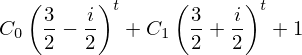

In [16]:
t = sp.Symbol('t', integer = True)
c = sp.Symbol('c', integer = True)
y = sp.Function('y')
p=sp.Symbol("p")
yeq = sp.Eq(2*y(t+2) - 6*y(t+1) + 5*y(t), 1)
yeq

sp.rsolve(yeq, (y(t)))
q=sp.Eq(2* p**2-6*p+5, 0)
sp.solve(q,p)
sp.rsolve(yeq,y(t))

#2*(c*(10**(1/2)/2)**(t+2)*math.cos(numpy.arctan((1/3)*(t+2))))-6*(c*(10**(1/2)/2)**(t+1)*math.cos(numpy.arctan((1/3)*(t+1))))+5**(c*(10**(1/2)/2)**(t)*math.cos(numpy.arctan((1/3)*(t))))

# Problem2 : Cobbweb model

In [17]:
t = sp.Symbol('t', integer = True)
y = sp.Function('y')
cobb = sp.Eq(y(t+1), 3/0.4 - 3/4*y(t)) 
cobb

In [18]:
# the gift
def path(fun, start, iter): 
    x = numpy.zeros(2*iter+1)  #two points (two iterations)
    y = numpy.zeros(2*iter+1)
    x[0] = start
    y[0] = 0
    i = 1
    while i < 2*iter:
        x[i] = x[i-1]
        y[i] = fun(x[i])
        x[i+1] = y[i]
        y[i+1] = y[i]
        i += 2
    u = numpy.zeros(len(x)-1)
    v = numpy.zeros(len(y)-1)
    for i in range(len(x)-1):
        u[i] = x[i+1] - x[i]
        v[i] = y[i+1] - y[i]
    return(x, y, u, v)


In [19]:
# prepare a python function
recF = sp.lambdify(y(t), cobb.rhs, "numpy")
display(
    cobb,
    inspect.findsource(recF)
    )

(['def _lambdifygenerated(_Dummy_263):\n',
  '    return (7.5 - 0.75*_Dummy_263)\n'],
 0)

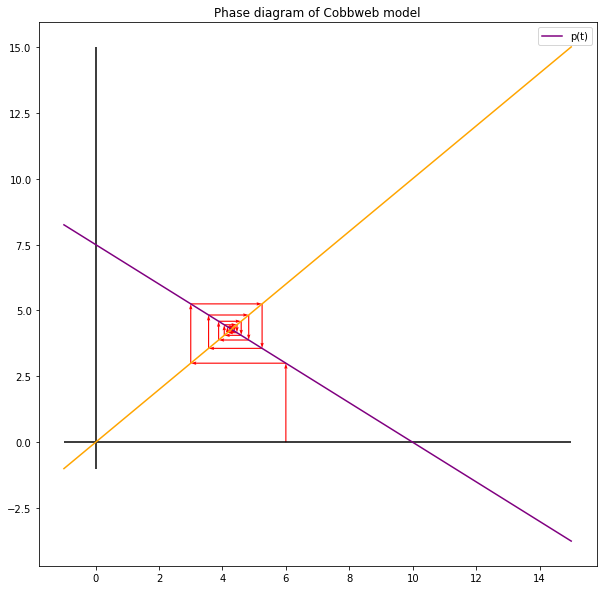

In [20]:
tval = numpy.linspace(-1, 15, 5)
x, y, u, v = path(recF, 6, 16)

plt.figure(figsize=(10,10))
plt.plot(tval, recF(tval),color="purple",label="p(t)")
plt.plot(tval, tval, color = 'orange')
plt.vlines(0, -1, 15, color = 'black')
plt.hlines(0, -1, 15, color = 'black')
plt.legend()
plt.title("Phase diagram of Cobbweb model")
plt.quiver(x[:-1],y[:-1], u, v,  angles='xy', scale_units='xy', scale=1, width = 0.002, color = 'red')

In [21]:
Qd = sp.Symbol('Q_d')                # quantity demanded
Qs = sp.Symbol('Q_s')                # quantity supplied 
t = sp.Symbol('t', integer = True)   # time
p = sp.Function('p')                   # price
a = sp.Symbol('a')                   # quantity demanded at zero price
b = sp.Symbol('b')                   # price sensitivity of demand (D slope)
c = sp.Symbol('c')                   # quantity supplied at zero price
d = sp.Symbol('d')                   # price sensitivity of supply (S slope)

In [22]:
demand = sp.Eq(Qd, a - b*p(t))
supply = sp.Eq(Qs, c + d*p(t-1))
display(demand, supply)

In [23]:
a=5
b=0.4
c=2
d=0.3
demand = sp.Eq(Qd, a - b*p(t))
supply = sp.Eq(Qs, c + d*p(t-1))
cobb=sp.Eq(a - b*p(t), c + d*p(t-1))
display(demand, supply)

In [24]:
sp.rsolve(cobb,p(t))

# Solow model

In [25]:
import sympy as sp

kt = sp.Function('k') 
k=sp.Symbol("k") # quantity demanded
s = sp.Symbol('s')                # quantity supplied 
t = sp.Symbol('t', integer = True)   # time
a=sp.Symbol("a")
A=sp.Symbol("A") # price
n = sp.Symbol('n')                   # quantity demanded at zero price
d = sp.Symbol('d')                   # price sensitivity of demand (D slope)
                  # price sensitivity of supply (S slope)

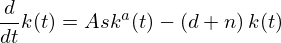

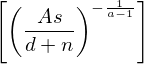

In [26]:
solow = sp.Eq(kt(t).diff(), s*A*kt(t)**a - (n+d)*kt(t))
display(solow)
steady= sp.Eq(0, s*A*kt(t)**a - (n+d)*kt(t))
display(sp.solve(steady,kt(t)))

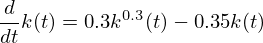

In [27]:
A=3
a=0.3
s=0.1
d=0.25
n=0.1
solow = sp.Eq(kt(t).diff(), s*A*kt(t)**a - (n+d)*kt(t))
steady= sp.Eq(0, s*A*kt(t)**a - (n+d)*kt(t))
display(solow)
display(sp.solve(steady,kt(t)))

In [7]:
from __future__ import print_function
import inspect

import sympy as sp
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import math 
import ipywidgets as widgets
from ipywidgets import FloatSlider

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sp.init_printing()

In [ ]:
t = sp.Symbol('t', integer = True)
k = sp.Function('k')
def fs(val, min, max, step):
    return FloatSlider(value=val, min=min, max=max, step=step, continuous_update = False)
@interact
def sinewaves (s=fs(0.1,0,1,0.01),A=fs(3,1,15,0.01), a=fs(0.3,0,1,0.01), n=fs(0.1,0,1,0.01),d=fs(0.25,0,1,0.01)):
    rec = sp.Eq(k(t).diff(), s*A*k(t)**a - (n+d)*k(t))
    recF = sp.lambdify(k(t), rec.rhs, "numpy")
    steady= sp.Eq(0, s*A*k(t)**a - (n+d)*k(t))
    kstar=numpy.array(sp.solve(steady,k(t)))
    a=kstar[1]
    print(a)
    display(
    rec,
    #inspect.findsource(recF)
    )
    tval = numpy.linspace(0,20,2000)
    plt.figure(figsize=(5,5))
    plt.plot(tval, recF(tval),color="purple",label="kdot(t)")
    plt.scatter(kstar[1],0,label="k*")
    plt.legend()
    plt.vlines(0,-1,2, color = 'black')
    plt.hlines(0,-1,kstar[1]+1, color = 'black')
    return plt.figure()